### Notes for Lesson 6: Linear Correlation and Regression

Syllabus: "Forecasting and basic modelling"

1. Simple linear models
    - gradient
    - intercept
    - calculation
    - plotting
2. Correlation
3. Linear Regression from scratch and from scipy


Look at:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

http://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20%28NEJM%29.pdf

In [1]:
import pandas as pd

In [2]:
bus = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/BritishBusCompanies1951/BritishBusCompanies1951-LinReg-1951.csv")
bus

,Expenses per car mile (pence),Car miles per year (1000s),Percent of Double Deckers in fleet,Percent of fleet on fuel oil,Receipts per car mile (pence)
0,19.76,6235,100.00,100.00,25.10
1,17.85,46230,43.67,84.53,19.23
2,19.96,7360,65.51,81.57,21.42
3,16.80,28715,45.16,93.33,18.11
4,18.20,21934,49.20,83.07,19.24
5,16.71,1337,74.84,94.99,19.31
6,18.81,17881,70.66,92.34,20.07
7,20.74,2319,63.93,95.08,24.35
8,16.56,18040,14.45,61.24,17.60
9,18.55,1147,68.58,97.90,20.13


In [3]:
bus.plot.scatter(x="Expenses per car mile (pence)",y="Receipts per car mile (pence)")

Correlation matrix

In [4]:
bus.corr()

,Expenses per car mile (pence),Car miles per year (1000s),Percent of Double Deckers in fleet,Percent of fleet on fuel oil,Receipts per car mile (pence)
Expenses per car mile (pence),1.000000,-0.397824,0.569748,0.032195,0.786877
Car miles per year (1000s),-0.397824,1.000000,-0.439996,-0.018837,-0.279548
Percent of Double Deckers in fleet,0.569748,-0.439996,1.000000,0.551176,0.473471
Percent of fleet on fuel oil,0.032195,-0.018837,0.551176,1.000000,0.135508
Receipts per car mile (pence),0.786877,-0.279548,0.473471,0.135508,1.000000


Standard units are needed for the correlation r calculation. Standard units are a way of putting different kinds of observations on the same scale. The idea is to replace a datum by the number of standard deviations it is above the mean of the data.

In [5]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - any_numbers.mean())/any_numbers.std()

In [6]:
bus_su = standard_units(bus[["Expenses per car mile (pence)","Receipts per car mile (pence)"]])
bus_su.head()

,Expenses per car mile (pence),Receipts per car mile (pence)
0,1.107273,2.241825
1,-0.222847,-0.251097
2,1.246552,0.678971
3,-0.954065,-0.726748
4,0.020892,-0.246850


In [7]:
bus_su["product of standard units"] = bus_su["Expenses per car mile (pence)"] * bus_su["Receipts per car mile (pence)"]
bus_su.head()

,Expenses per car mile (pence),Receipts per car mile (pence),product of standard units
0,1.107273,2.241825,2.482312
1,-0.222847,-0.251097,0.055956
2,1.246552,0.678971,0.846373
3,-0.954065,-0.726748,0.693365
4,0.020892,-0.246850,-0.005157


In [8]:
bus_r = bus_su["product of standard units"].mean()
bus_r # This is the correlation r

0.7540906311000174

In [9]:
def correlation(df,x,y):
    _df_prod = standard_units(df[x]) * standard_units(df[y])
    return _df_prod.mean()

In [10]:
correlation(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

0.7540906311000174

The correlation coefficient  r  doesn't just measure how clustered the points in a scatter plot are about a straight line. It also helps identify the straight line about which the points are clustered.

Equation of the regression line: ${\large Estimate\space of\space y = r * x}$ - only when both variables are measured in stanard units. This leads to the following equations:

${\large slope\space of\space the\space regression\space line=r*\frac{SD of y}{SD of x}}$

${\large intercept\space of\space the\space regression\space line=avY - slope*avX}$

In [11]:
def slope(df,x,y):
    _r = correlation(df,x,y)
    _std_ratio = df[y].std()/df[x].std()
    return _r * _std_ratio

In [12]:
slope(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

1.2365465592422655

In [13]:
def intercept(df,x,y):
    #np.mean(t.column(label_y)) - 
    #slope(t, label_x, label_y)*np.mean(t.column(label_x))
    _mean_y = df[y].mean()
    _mean_x = df[x].mean()
    _slope = slope(df,x,y)
    return _mean_y - _mean_x*_slope

In [14]:
intercept(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

-2.646800981431973

In [ ]:
def fit(df,x,y):
    m = slope(df,x,y)
    c = intercept(df,x,y)
    return m*df[x]+c

In [ ]:
bus["fitted"] = fit(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

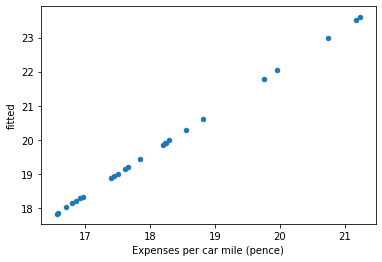

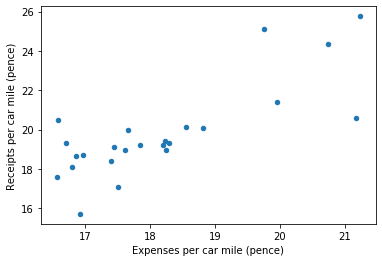

In [17]:
bus.plot.scatter(x="Expenses per car mile (pence)",y="fitted")
bus.plot.scatter(x="Expenses per car mile (pence)",y="Receipts per car mile (pence)")

In [ ]:
# Produce a function that automaticall predicts the other thing
m = slope(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")
c = intercept(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")

x = lambda a : a + 10
z = int(input("Input Expenses per car mile (pence): "))
print(x(z) , " is the predicted receipts per car mile (pence)")

In [ ]:
while: 
    z = int(input("Input Expenses per car mile (pence): "))

In [ ]:
def residual(df,x,y):
    return df[y]-fit(df,x,y)

In [ ]:
bus["res"] = residual(bus,"Expenses per car mile (pence)","Receipts per car mile (pence)")
bus.head()

In [ ]:
bus["abs res"] = (bus["res"]**2)**0.5

In [ ]:
bus.plot.scatter(
    x="Expenses per car mile (pence)",
    y="res",
    grid=True,
    c="abs res",
    colormap='viridis'
)

The residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.

When a residual plot shows a pattern, there may be a non-linear relation between the variables.

Therefore, our data set has heteroscedasticity (uneven spread). 

If the residual plot shows uneven variation about the horizontal line at 0, the regression estimates are not equally accurate across the range of the predictor variable.

No matter what the shape of the scatter diagram, the average of the residuals is 0.

In [ ]:
bus["res"].mean() # basically zero

No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the response variable. 

${SD\space of\space res=\sqrt{1-r^2}*SD\space of\space Y}$

In [ ]:
#SD of res
bus["res"].std() #Sample

In [ ]:
#SD of res
(1-bus_r**2)**0.5 * bus["Receipts per car mile (pence)"].std() #Population

${\large \left| r \right| = \frac{SD\space of\space  fitted\space  values}{SD\space  of\space  y\space  values}}$

${\large r^2 = \frac{Var\space of\space  fitted\space  values}{Var\space  of\space  y\space  values}}$

In [ ]:
bus_r ** 2

In [ ]:
bus["fitted"].var()/bus["Receipts per car mile (pence)"].var()

Testing the two are the same

In [ ]:
round(bus_r ** 2,4) == round(bus["fitted"].var()/bus["Receipts per car mile (pence)"].var(),4)

--------

In [ ]:
import pandas as pd
birthrate = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/BirthRateEconomicDevelopment/birthrate.csv")
birthrate.head()

In [ ]:
birthrate.corr()

In [ ]:
elect = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/ElectricityConsumptionPrice1937/electricity.csv")
elect.head()

In [ ]:
elect.corr()

In [ ]:
electtrain = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/ElectricTrainUsage1888/electrictrain.csv")
electtrain.head()

In [ ]:
electtrain.corr().loc["Week Number","Miles per week"] ** 2

In [ ]:
electtrain["res"] = residual(electtrain,"Week Number","Miles per week")
electtrain["fit"] = fit(electtrain,"Week Number","Miles per week")

In [ ]:
electtrain.plot.scatter(
    x="Week Number",
    y="res"
)
electtrain.plot.scatter(
    x="Week Number",
    y="Miles per week"
)
electtrain.plot.scatter(
    x="Week Number",
    y="fit"
)

In [ ]:
electtrain.plot.scatter(
    x="Number of cars operating",
    y="Passengers per week"
)